In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec

In [2]:
## Reding in the data table

table   = np.genfromtxt('F1-p100-circle.csv' , delimiter=',', filling_values=-1, names=True, dtype=None)

prob = table['probability']
ampl  = table['amplitude']
period  = table['period']

It looks liket he probality doesn't depend that much on the Aplitude.
This is the "priod" which changes probaility

Text(0.5,0,'Probability')

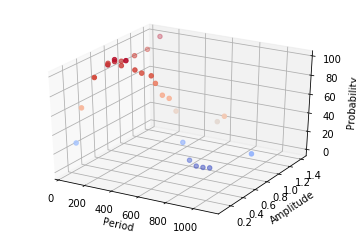

In [3]:
ax = plt.gcf().add_subplot(1,1,1, projection='3d')

ax.scatter(period, ampl, prob, c=prob, cmap=cm.coolwarm)

ax.set_xlabel('Period')
ax.set_ylabel('Amplitude')
ax.set_zlabel('Probability')

## Data Exploration

Text(0,0.5,'Probability')

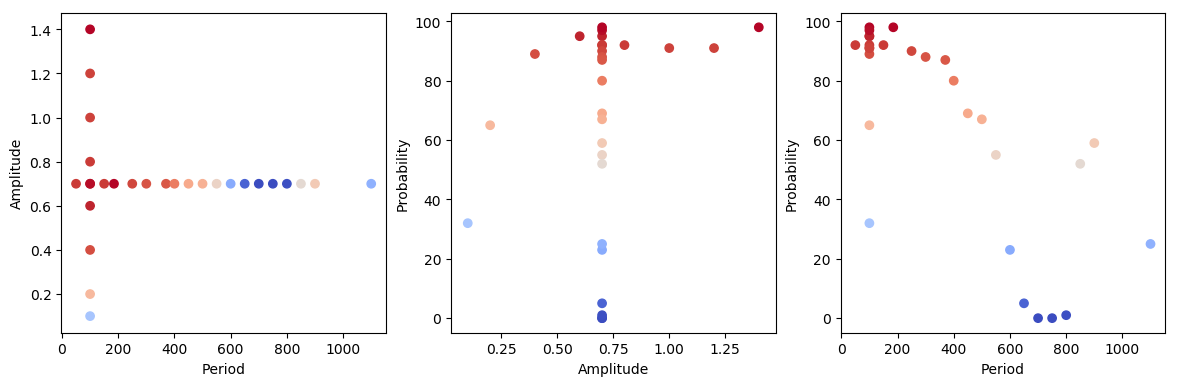

In [4]:
fig = py.figure(figsize=(12,4), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,3) ; p=0
plt.subplots_adjust(hspace=0, wspace=0.2)

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(period, ampl, c=prob, cmap=cm.coolwarm)
ax.set_xlabel('Period')
ax.set_ylabel('Amplitude')

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(ampl, prob, c=prob, cmap=cm.coolwarm)
ax.set_xlabel('Amplitude')
ax.set_ylabel('Probability')

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(period, prob, c=prob, cmap=cm.coolwarm)
ax.set_xlabel('Period')
ax.set_ylabel('Probability')

## Regression (Fitting a function)

- The result does not look promissing, changing the function may help

 fit coefficients:
[ 5.40033330e+02 -3.69701257e-01  2.61217382e-01]


Text(0,0.5,'Probability')

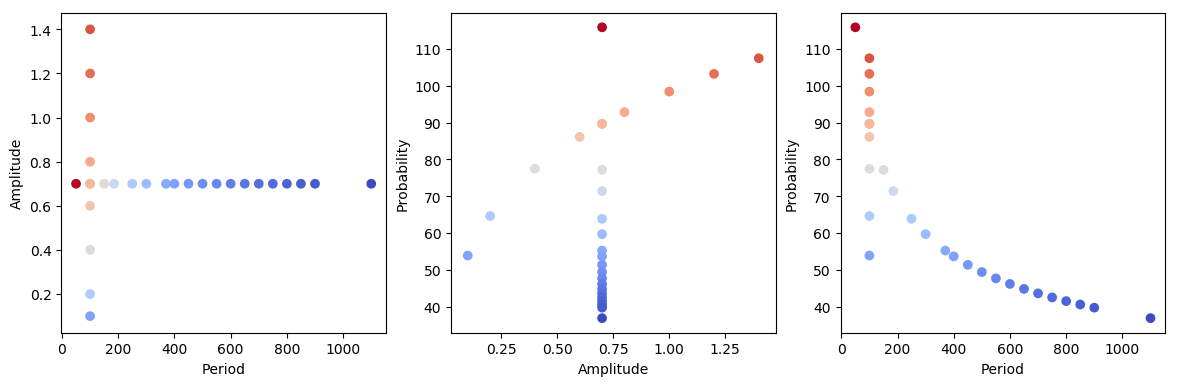

In [5]:
from scipy.optimize import curve_fit

def fitFunc(xy, A, B, C):
    return A * (xy[0]**B) * (xy[1]**C)

xy = np.array([period, ampl])


fitParams, fitCovariances = curve_fit(fitFunc, xy, prob)
print ' fit coefficients:\n', fitParams

A = fitParams[0]
B = fitParams[1]
C = fitParams[2]


prob_model = fitFunc(xy, A, B, C)

fig = py.figure(figsize=(12,4), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,3) ; p=0
plt.subplots_adjust(hspace=0, wspace=0.2)

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(period, ampl, c=prob_model, cmap=cm.coolwarm)
ax.set_xlabel('Period')
ax.set_ylabel('Amplitude')

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(ampl, prob_model, c=prob_model, cmap=cm.coolwarm)
ax.set_xlabel('Amplitude')
ax.set_ylabel('Probability')

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(period, prob_model, c=prob_model, cmap=cm.coolwarm)
ax.set_xlabel('Period')
ax.set_ylabel('Probability')

In [6]:
## Preparing data for the Gaussian Process

N = len(prob)
X = np.ones(shape = (2,N))
X[0] = period
X[1] = ampl
X = X.T

y = prob

## Gaussian Process
Let data decides the behavior of the model

/Users/ehsan/.conda/envs/py27/lib/python2.7/site-packages/sklearn/gaussian_process/kernels.py:247: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))


Text(0.5,0,'Probability')

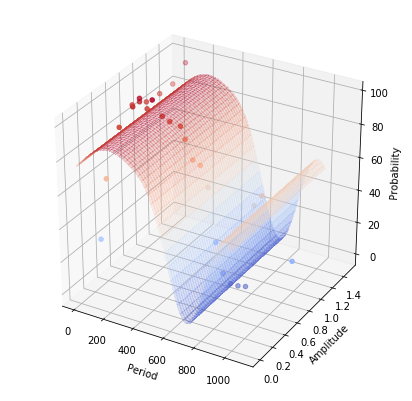

In [7]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = ConstantKernel() + 1.0 * RBF(1) + WhiteKernel(noise_level=0)
gpc = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20).fit(X, y)
gpc.score(X, y) 

rx, ry = np.linspace(0,1000,100), np.linspace(0,1.5,100)
a0, b0 = np.meshgrid(rx, ry)
x = np.c_[a0.ravel(), b0.ravel()]
y_pred, sigma = gpc.predict(x, return_std=True)


plt.figure(figsize=(7,7))
ax = plt.gcf().add_subplot(1,1,1, projection='3d')

# plotting the Gaussian process model
ax.plot_surface(a0, b0, y_pred.reshape(a0.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)

# plotting dat apoints
ax.scatter(period, ampl, prob, c=prob, cmap=cm.coolwarm)
ax.set_xlabel('Period')
ax.set_ylabel('Amplitude')
ax.set_zlabel('Probability')